<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [31]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [21]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


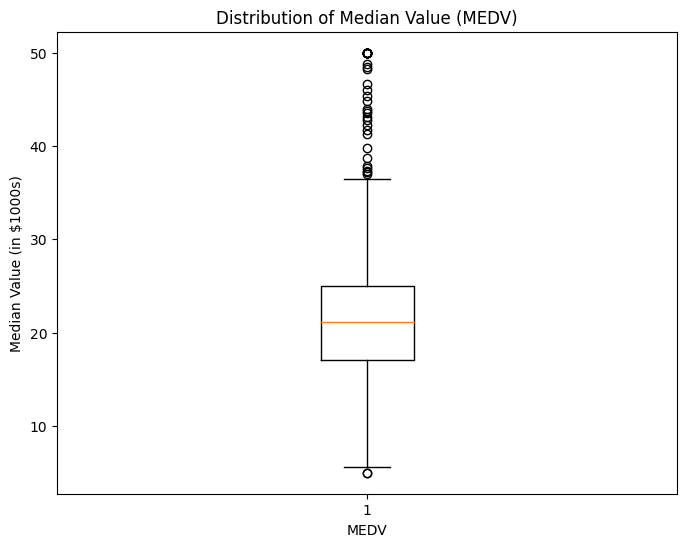

In [18]:
pyplot.figure(figsize=(8, 6))
pyplot.boxplot(boston_df['MEDV'].dropna())  
pyplot.title('Distribution of Median Value (MEDV)')  
pyplot.xlabel('MEDV')                             
pyplot.ylabel('Median Value (in $1000s)')          
pyplot.show()

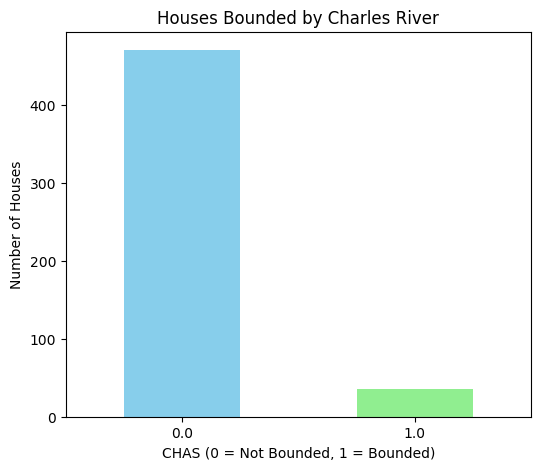

In [22]:
chas_counts = boston_df['CHAS'].value_counts()
pyplot.figure(figsize=(6, 5))
chas_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
pyplot.title("Houses Bounded by Charles River")
pyplot.xlabel("CHAS (0 = Not Bounded, 1 = Bounded)")
pyplot.ylabel("Number of Houses")
pyplot.xticks(rotation=0)  
pyplot.show()

<Figure size 800x600 with 0 Axes>

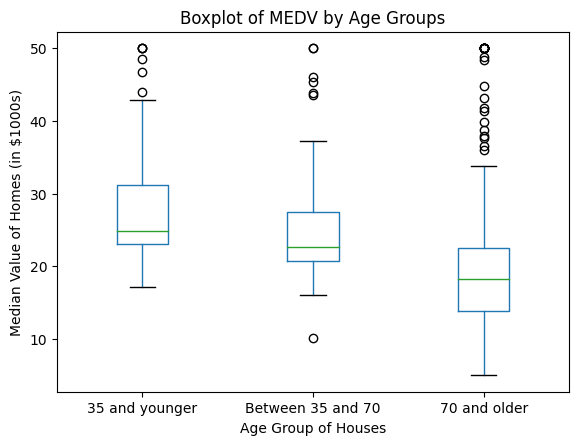

In [24]:
bins = [0, 35, 70, 100] 
labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)
pyplot.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
pyplot.title("Boxplot of MEDV by Age Groups")
pyplot.suptitle("")  
pyplot.xlabel("Age Group of Houses")
pyplot.ylabel("Median Value of Homes (in $1000s)")

pyplot.show()

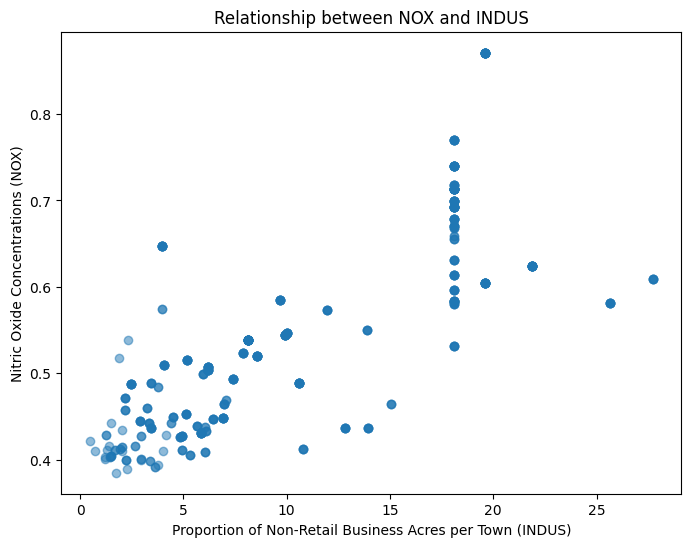

In [26]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5)
pyplot.title("Relationship between NOX and INDUS")
pyplot.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentrations (NOX)")

pyplot.show()

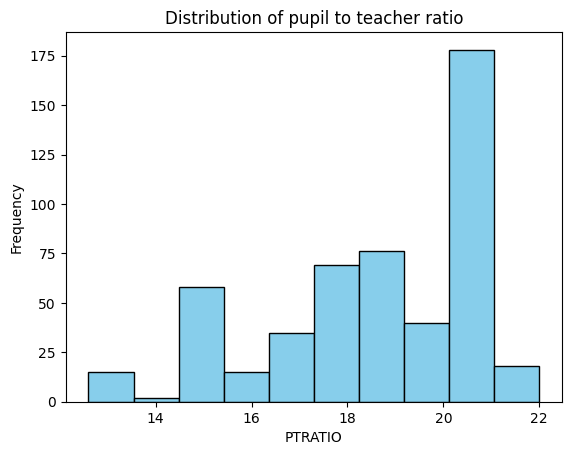

In [29]:
pyplot.figure()
pyplot.hist(boston_df['PTRATIO'], color='skyblue', edgecolor='black')
pyplot.title("Distribution of pupil to teacher ratio")
pyplot.xlabel("PTRATIO")
pyplot.ylabel("Frequency")
pyplot.show()

In [32]:
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = stats.ttest_ind(chas0, chas1, equal_var=False)
t_stat, p_val

(-3.113291312794837, 0.003567170098137517)

H₀: There is no difference in median value of houses between tracts bounded by the Charles River and those not bounded.

H₁: There is a difference in median value of houses between the two groups.

Since pvalue is less than 0.05, we reject the null hypothesis.

In [33]:
bins = [0, 35, 70, 100]
labels = ['≤35', '35–70', '≥70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)
g1 = boston_df[boston_df['AGE_group'] == '≤35']['MEDV']
g2 = boston_df[boston_df['AGE_group'] == '35–70']['MEDV']
g3 = boston_df[boston_df['AGE_group'] == '≥70']['MEDV']
f_stat, p_val = stats.f_oneway(g1, g2, g3)
f_stat, p_val

(36.40764999196599, 1.7105011022702984e-15)

H₀: Mean MEDV is the same across all AGE groups.

H₁: At least one group’s MEDV differs.

Since pvalue is more than 0.05, we fail to reject the null hypothesis, i.e., there is no significant difference among the mean MEDV across all AGE groups.

In [34]:
corr, p_val = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
corr, p_val

(0.7636514469209192, 7.913361061210442e-98)

H₀: There is no linear relationship between NOX and INDUS.

H₁: There is a linear relationship between NOX and INDUS.

pvalue is less than 0.05, we reject null hypothsis (there is significant difference).

In [36]:
X = boston_df[['DIS']] 
y = boston_df['MEDV'] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        12:35:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

pvalue less than 0.05, hence significant. R-squared value is 0.062.